In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

#Machine Learning Packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error,recall_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/BBData (1).csv', engine='python', on_bad_lines='skip')

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


#**Exploratory Data Analysis (EDA)**

In [ ]:
# Numbe rof Unique Categories of Products

num_unique_categories = df['category'].nunique()
print("Number of unique product categories:", num_unique_categories)


Number of unique product categories: 11


In [ ]:
 #Fetch the top categories
top_categories = df['category'].value_counts().head(10)
print(top_categories)

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Name: count, dtype: int64


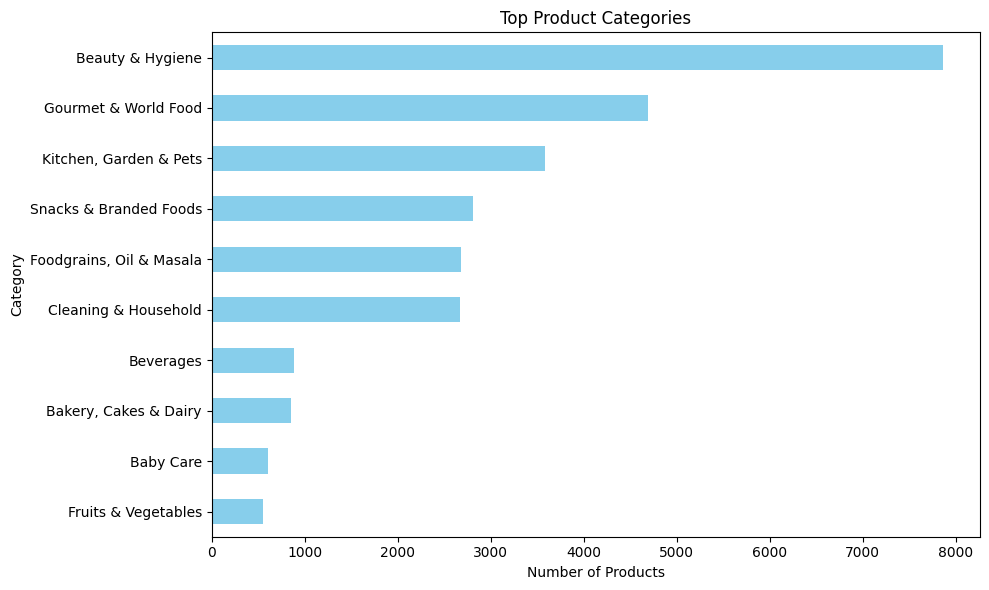

In [ ]:
top_categories.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.title('Top Product Categories')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
#Fetch the least categories
print('Fetch the least categories')
least_categories = df['category'].value_counts(ascending=True).head(10)
print(least_categories)

Fetch the least categories
category
Eggs, Meat & Fish            350
Fruits & Vegetables          557
Baby Care                    610
Bakery, Cakes & Dairy        851
Beverages                    885
Cleaning & Household        2675
Foodgrains, Oil & Masala    2676
Snacks & Branded Foods      2814
Kitchen, Garden & Pets      3580
Gourmet & World Food        4690
Name: count, dtype: int64


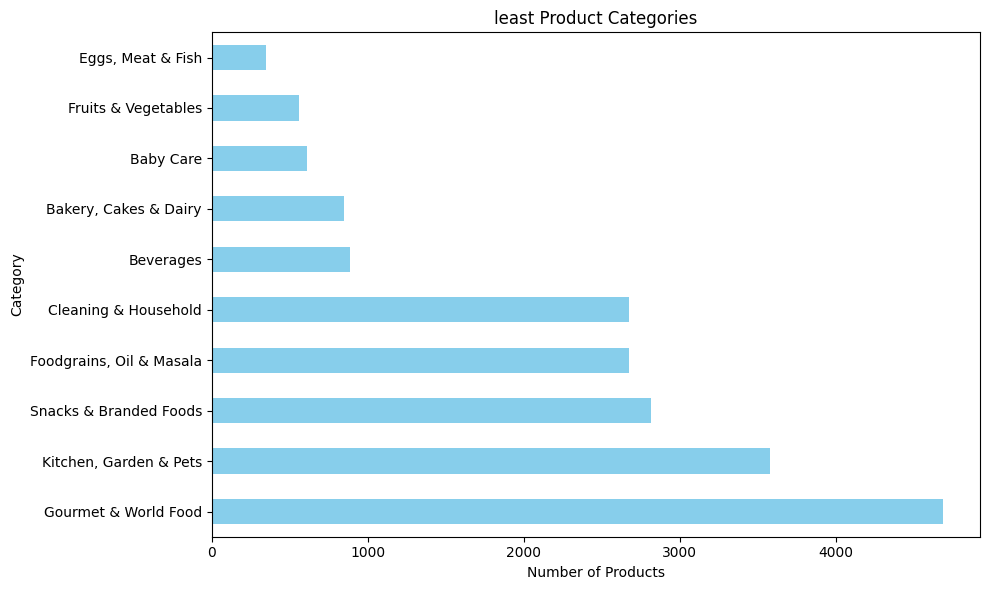

In [ ]:
least_categories.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.title('least Product Categories')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Average sale and average market price
print('Average sale and average market price')
avg_sale = df['sale_price'].mean()
avg_market_price = df['market_price'].mean()

print(f"Average Sale Price: {avg_sale:.2f}")
print(f"Average Market Price: {avg_market_price:.2f}")

Average sale and average market price
Average Sale Price: 322.51
Average Market Price: 382.06


Average Sale Price: 322.51
Average Market Price: 382.06


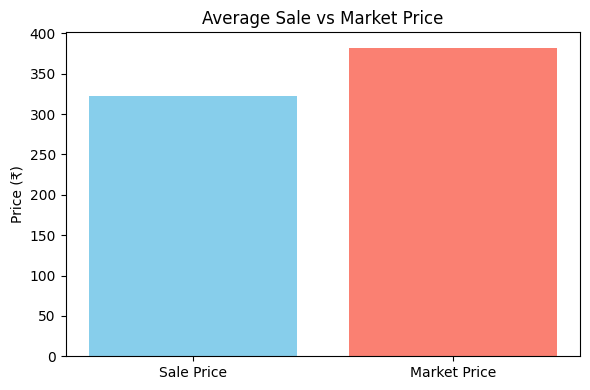

In [ ]:
# Calculate mean
avg_sale = df['sale_price'].mean()
avg_market_price = df['market_price'].mean()

# Average values
print("Average Sale Price:", round(avg_sale, 2))
print("Average Market Price:", round(avg_market_price, 2))

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Sale Price', 'Market Price'], [avg_sale, avg_market_price], color=['skyblue', 'salmon'])
plt.title('Average Sale vs Market Price')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()

In [ ]:
#Max discounted item is Premium Cloth Dryer/Drying Stand - Foldable and the discounted amount is 4320 and sale price 4649 and MRP is 8969.
# Calculate discount amount and percentage
df['discount_amount'] = df['market_price'] - df['sale_price']
df['discount_percent'] = (df['discount_amount'] / df['market_price']) * 100

# Find the row with the maximum discount amount
df_sorted = df.sort_values(by='discount_amount', ascending=False)
max_discount_row = df_sorted.iloc[0]

# Display the result
print("Max Discounted Item:")
print(f"Product: {max_discount_row['product']}")
print(f"Category: {max_discount_row['category']} / {max_discount_row['sub_category']}")
print(f"Brand: {max_discount_row['brand']}")
print(f"MRP: {max_discount_row['market_price']}")
print(f"Sale Price: {max_discount_row['sale_price']}")
print(f"Discount Amount: ₹{max_discount_row['discount_amount']}")
print(f"Discount : {max_discount_row['discount_percent']:.2f}%")

Max Discounted Item:
Product: Premium Cloth Dryer/Drying Stand - Foldable, Silver, BB 1434
Category: Kitchen, Garden & Pets / Storage & Accessories
Brand: DP
MRP: 8969.0
Sale Price: 4649.0
Discount Amount: ₹4320.0
Discount : 48.17%


In [ ]:
# Filter products where sale_price equals market_price
same_price_products = df[df['sale_price'] == df['market_price']]

# output
print("Products with no discount (sale price = market price):")
print(same_price_products[['product', 'category', 'brand', 'sale_price', 'market_price']])

count_same_price = same_price_products.shape[0]
print(f"\nTotal products with no discount: {count_same_price}")

Products with no discount (sale price = market price):
                                         product                category  \
0         Garlic Oil - Vegetarian Capsule 500 mg        Beauty & Hygiene   
1                          Water Bottle - Orange  Kitchen, Garden & Pets   
4             Creme Soft Soap - For Hands & Body        Beauty & Hygiene   
6                                   Multani Mati        Beauty & Hygiene   
7              Hand Sanitizer - 70% Alcohol Base        Beauty & Hygiene   
...                                          ...                     ...   
27541  Herbal Rose & Apricot Walnut Facial Scrub        Beauty & Hygiene   
27547                            Powder - Baking  Snacks & Branded Foods   
27548                Apple Cider Vinegar Shampoo        Beauty & Hygiene   
27549                       Papad - Garlic Disco  Snacks & Branded Foods   
27552               Peri-Peri Sweet Potato Chips    Gourmet & World Food   

                   brand  sale_p

In [ ]:
df['product'].value_counts()

,count
product,
Turmeric Powder/Arisina Pudi,26
Extra Virgin Olive Oil,15
Cow Ghee/Tuppa,14
Olive Oil - Extra Virgin,12
Soft Drink,12
...,...
"Opalware Classique Serving Bowl - Medium, Royal Irish",1
"Lavangadi Vati - Respiratory Conditions, 300mg",1
Pomegranate - Small,1


In [ ]:
df['category'].value_counts()

,count
category,
Beauty & Hygiene,7867
Gourmet & World Food,4690
"Kitchen, Garden & Pets",3580
Snacks & Branded Foods,2814
"Foodgrains, Oil & Masala",2676
Cleaning & Household,2675
Beverages,885
"Bakery, Cakes & Dairy",851
Baby Care,610


In [ ]:
df['sub_category'].value_counts()

,count
sub_category,
Skin Care,2294
Health & Medicine,1133
Hair Care,1028
Storage & Accessories,1015
Fragrances & Deos,1000
...,...
Mutton & Lamb,20
Water,17
"Flower Bouquets, Bunches",8


In [ ]:
df['brand'].value_counts()

,count
brand,
Fresho,638
bb Royal,539
BB Home,428
DP,250
Fresho Signature,171
...,...
Sanitt,1
Fazlani,1
Fakira,1


In [ ]:
df['sale_price'].value_counts()

,count
sale_price,
99.00,406
50.00,317
199.00,317
299.00,302
150.00,291
...,...
300.20,1
277.40,1
329.40,1


In [ ]:
df['market_price'].value_counts()

,count
market_price,
199.0,584
150.0,469
99.0,465
50.0,446
250.0,429
...,...
767.0,1
3118.0,1
9695.0,1


In [ ]:
df['type'].value_counts()

,count
type,
Face Care,1508
Ayurveda,538
Men's Deodorants,500
Shampoo & Conditioner,461
Glassware,415
...,...
Bagels & Baguette,1
Roses,1
Prawns & Shrimps,1


In [ ]:
df['rating'].value_counts()

,count
rating,
4.2,2251
4.3,2140
4.0,2090
4.1,1769
5.0,1407
4.4,1038
3.9,932
3.8,866
4.5,798


In [ ]:
df['description'].value_counts()

,count
description,
"A brand inspired by the Greek goddess of victory, it personifies strength, speed and energy and it launched its first perfume in 1929. Since then, a wide assortment of fragrance collections has hit the marketplace with refreshing, and eye-catching proposals that capture the essence and lifestyle of today´s man and woman.",47
"Baldessarini Ambre Cologne is built around a whisky accord and complemented by top notes of mandarin and red apple, leading to a heart of violet, offset by a leather accord. With a base that blends notes of amber, oakwood, vanilla and labdanum. For Beauty tips, tricks & more visit https://bigbasket.blog/",44
"Now free your environment, and yourself from the unhealthy plastic bottles and get a healthier one-time product for all your needs. These high-grade stainless steel bottles are here to enhance your dining and travelling experience, saving you from the negative effects of plastic. The single-walled steel bottles are perfect add-ons to your kitchen collection if you are looking for light-weighed, durable, classy looking product. The bottle comes with sipper & wide mouth steel cap, catering to double usage. Be it going to the gym, or sending it with the kids to school, the colourful sipper can always make it a very convenient, handy and more importantly a style-statement product. You can take it to the office or just keep on the dinner table. Open the wide mouth lid and use at ease. The bottles come with the major USP of inter-changeable lid facility. Now you can make the same steel cap bottle as a sipper bottle by just interchanging the lids. Hence, get 2 of two-in-one featured bottles of same model and capacities and get the best of both, with a variety of colours!",37
"Energetic strong and stirred with action, X-MEN Charge Body Deodoratnt has the fragrance of pure desire in the most dashing way. Stay irrestible, 24x7.",35
"Joyo Klip It Stainless steel container comes with easy locking. These containers are made from high quality non-magnetic stainless steel body. Joyo Klip It container has odourless lid cover with food-grade silicone seal (gasket) in lid & has all 4 sides locks which ensure airtight containers for keeping food fresh, 100% leak-proof containers for keeping food from spilling, stackable design for easily storing the containers on top of each other and the pioneering clip mechanism. Take this container to the office, school, camping or hiking.",29
...,...
"Get the perfect combination of odour protection and skincare with the NIVEA MEN Protect & Care Roll-On. It keeps body odour in check, leaving you free to carry on with the day with confidence. The 0% Alcohol formula keeps you fresh without hurting your underarm skin.",1
"Veg Mayonnaise is a FunFoods innovation that was done keeping in view that many Indians are vegetarian. It is rich, smooth and creamy. Its neutral and adaptable taste makes it the perfect core ingredient for a wide array of western dishes such as sandwiches, burgers, wraps and quick white-sauce for macaroni.\nIt is 100% Veg, Cholesterol and Trans Fat-Free. It is India's largest selling mayonnaise. Make your sandwiches, wraps, macaroni and other exciting recipes, saucier, creamier, juicer. Comes in a smaller pack for easy application.",1
"Classmates Asteroid Geometry Box is a set of essential geometrical instruments used by school children, mathematicians and scientists alike. It comes equipped with all the necessary geometrical instruments such as, self centering compass cum divider, foldable 30 cm scale, special mechanical pencil of 0. 5 mm and lead Box with 10 Leads. This geometrical instrument box is the answer to your question for drawing complex diagrams and calculating those complicated geometrical measurements with ease.",1


In [ ]:
df['discount_amount'].value_counts()

,count
discount_amount,
0.00,12326
10.00,248
30.00,238
50.00,185
5.00,183
...,...
8.64,1
145.25,1
6.54,1


In [ ]:
df['discount_percent'].value_counts()

,count
discount_percent,
0.000000,12326
10.000000,1271
20.000000,1254
15.000000,831
25.000000,800
...,...
21.400000,1
51.696284,1
4.444444,1


In [ ]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8626
description,115


In [ ]:
#Removing null values from a particular column
df = df[df['rating'].notnull()]

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18840 entries, 0 to 27554
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             18840 non-null  int64  
 1   product           18840 non-null  object 
 2   category          18840 non-null  object 
 3   sub_category      18840 non-null  object 
 4   brand             18840 non-null  object 
 5   sale_price        18840 non-null  float64
 6   market_price      18840 non-null  float64
 7   type              18840 non-null  object 
 8   rating            18840 non-null  float64
 9   description       18840 non-null  object 
 10  discount_amount   18840 non-null  float64
 11  discount_percent  18840 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.9+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,index,sale_price,market_price,rating,discount_amount,discount_percent
count,18840.000000,18840.000000,18840.000000,18840.000000,18840.000000,18840.000000
mean,13797.413641,267.681222,322.011349,3.943063,54.330127,11.751733
std,7956.387838,364.400131,459.124974,0.739646,154.129083,14.546937
min,1.000000,3.000000,3.000000,1.000000,0.000000,0.000000
25%,6866.750000,85.000000,95.000000,3.700000,0.000000,0.000000
50%,13779.500000,165.000000,195.000000,4.100000,6.000000,5.000000
75%,20673.250000,306.000000,370.000000,4.300000,49.750000,20.000000
max,27555.000000,6660.000000,7400.000000,5.000000,3600.000000,82.506266


In [ ]:
df[(df['product'] == 'Hand Sanitizer - 70% Alcohol Base') & (df['sale_price']>=220)][['product','sale_price']]

,product,sale_price
7,Hand Sanitizer - 70% Alcohol Base,250.0


In [ ]:
df[(df['brand'].str.strip() == 'Sri Sri Ayurveda') & (df['rating'] >= 2.1)][['brand', 'rating']]

,brand,rating
0,Sri Sri Ayurveda,4.1
766,Sri Sri Ayurveda,5.0
10559,Sri Sri Ayurveda,4.6
12504,Sri Sri Ayurveda,4.0
13597,Sri Sri Ayurveda,4.0
13678,Sri Sri Ayurveda,4.0
19742,Sri Sri Ayurveda,4.5
27170,Sri Sri Ayurveda,3.4


In [ ]:
df[(df['sale_price'] > 220) & (df['market_price'] >= 149) & (df['category'] == 'Kitchen, Garden & Pets')][['sale_price','market_price','category']]

,sale_price,market_price,category
25,659.00,895.0,"Kitchen, Garden & Pets"
34,499.00,969.0,"Kitchen, Garden & Pets"
61,348.60,498.0,"Kitchen, Garden & Pets"
66,339.15,399.0,"Kitchen, Garden & Pets"
91,864.50,910.0,"Kitchen, Garden & Pets"
...,...,...,...
27464,525.00,525.0,"Kitchen, Garden & Pets"
27484,325.00,325.0,"Kitchen, Garden & Pets"
27485,329.00,725.0,"Kitchen, Garden & Pets"
27498,1071.00,1071.0,"Kitchen, Garden & Pets"


In [ ]:
#Selecting the columns
filtered_df = df[(df['sale_price'] > 220) & (df['market_price'] >= 149) & (df['category'] == 'Kitchen, Garden & Pets')]

#Calculate profit and loss
filtered_df['profit'] = (filtered_df['market_price'] - filtered_df['sale_price']).clip(lower=0)
filtered_df['loss'] = (filtered_df['sale_price'] - filtered_df['market_price']).clip(lower=0)

# Calculate profit percentage
filtered_df['percentage'] = ((filtered_df['market_price'] - filtered_df['sale_price']) / filtered_df['market_price']) * 100
filtered_df['percentage'] = filtered_df['percentage'].round(2)

# output
result = filtered_df[['sale_price', 'market_price', 'category', 'profit', 'loss', 'percentage']]
result

,sale_price,market_price,category,profit,loss,percentage
25,659.00,895.0,"Kitchen, Garden & Pets",236.00,0.0,26.37
34,499.00,969.0,"Kitchen, Garden & Pets",470.00,0.0,48.50
61,348.60,498.0,"Kitchen, Garden & Pets",149.40,0.0,30.00
66,339.15,399.0,"Kitchen, Garden & Pets",59.85,0.0,15.00
91,864.50,910.0,"Kitchen, Garden & Pets",45.50,0.0,5.00
...,...,...,...,...,...,...
27464,525.00,525.0,"Kitchen, Garden & Pets",0.00,0.0,0.00
27484,325.00,325.0,"Kitchen, Garden & Pets",0.00,0.0,0.00
27485,329.00,725.0,"Kitchen, Garden & Pets",396.00,0.0,54.62
27498,1071.00,1071.0,"Kitchen, Garden & Pets",0.00,0.0,0.00


In [ ]:
df.shape

(18840, 12)

#**Statistical Analysis and Visualization**

**Checking for outliers**

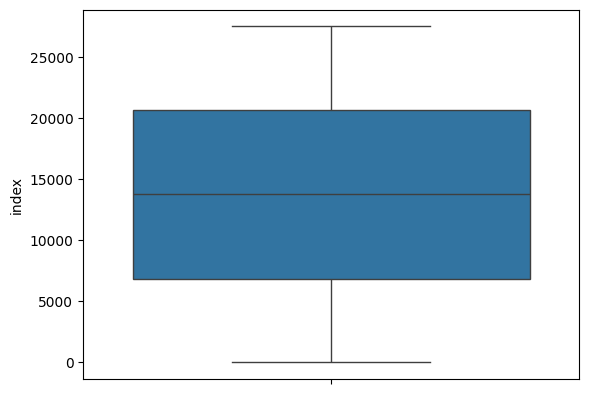

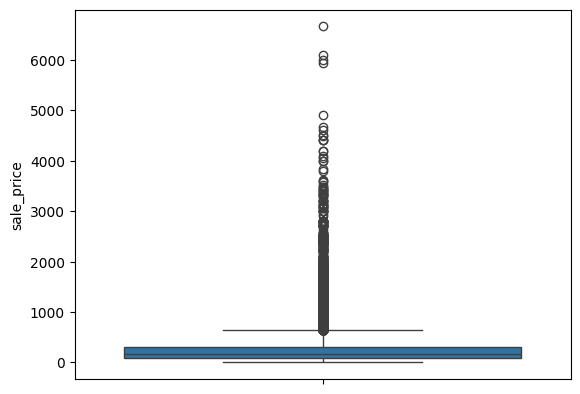

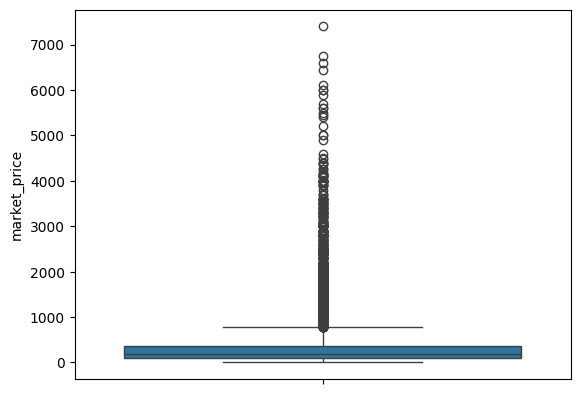

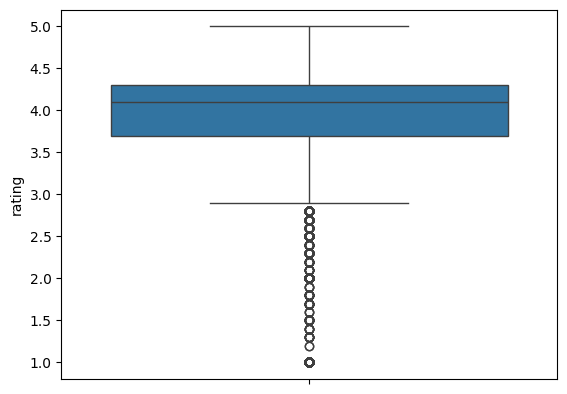

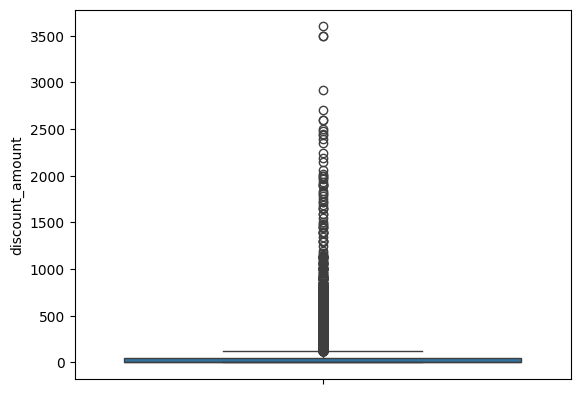

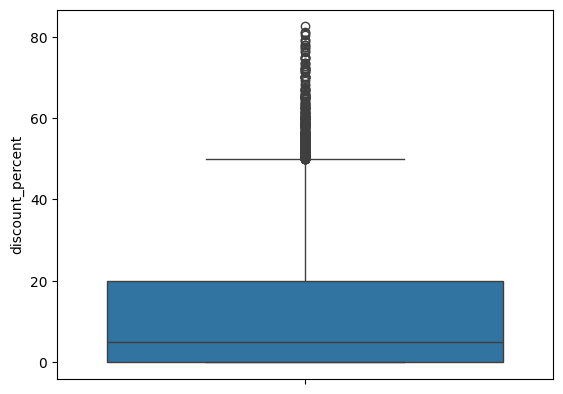

In [ ]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(df[col])
        plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include='number')

for col in numeric_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


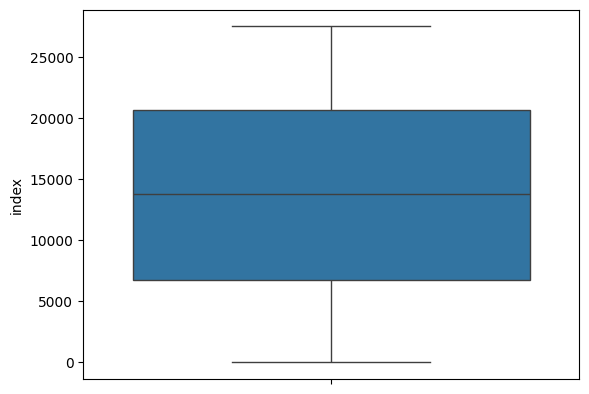

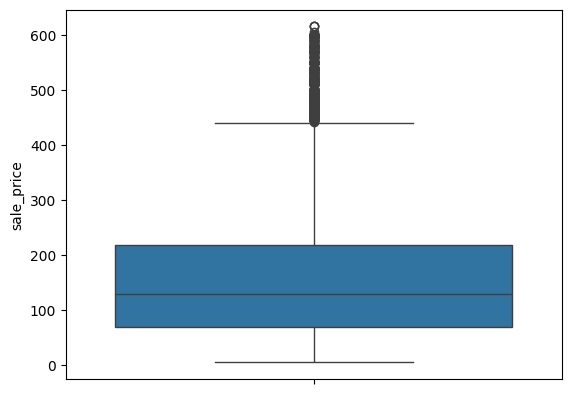

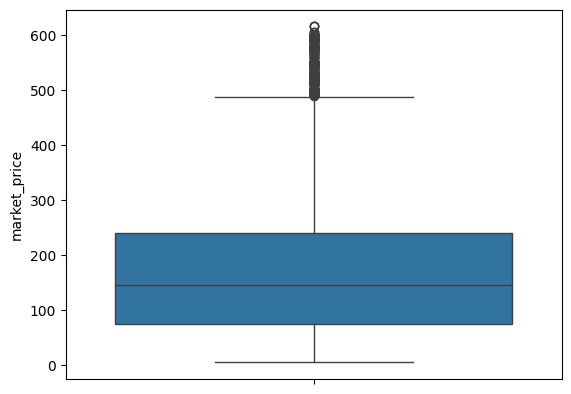

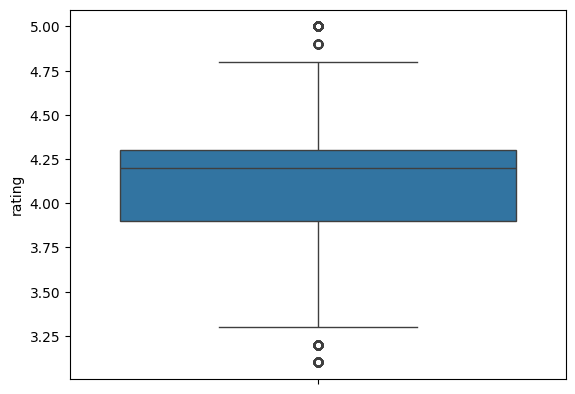

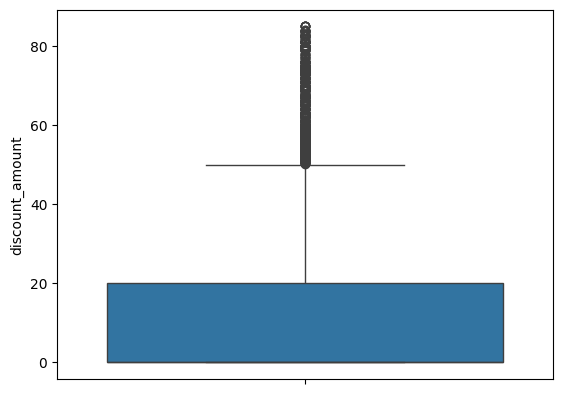

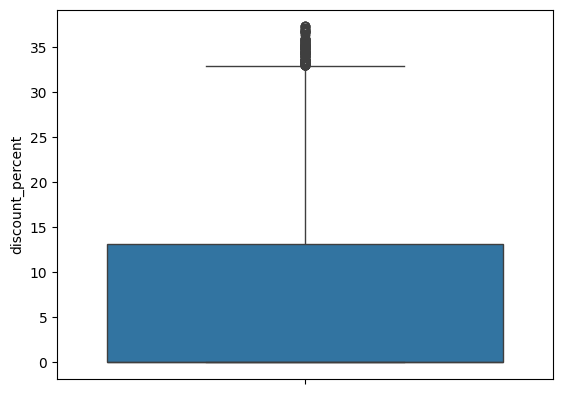

In [ ]:
for col in df.columns:
  if df[col].dtype !='object':
    sns.boxplot(df[col])
    plt.show()

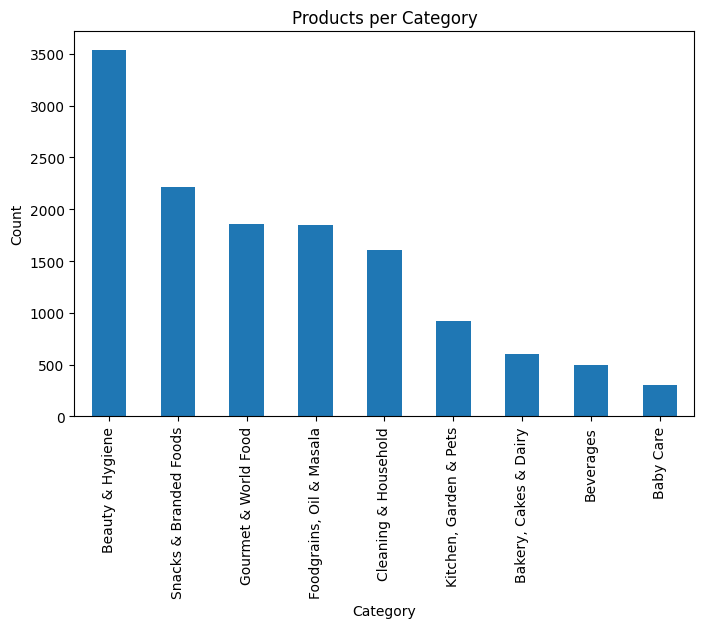

In [ ]:
plt.figure(figsize=(8,5))
df['category'].value_counts().plot(kind='bar')
plt.title("Products per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


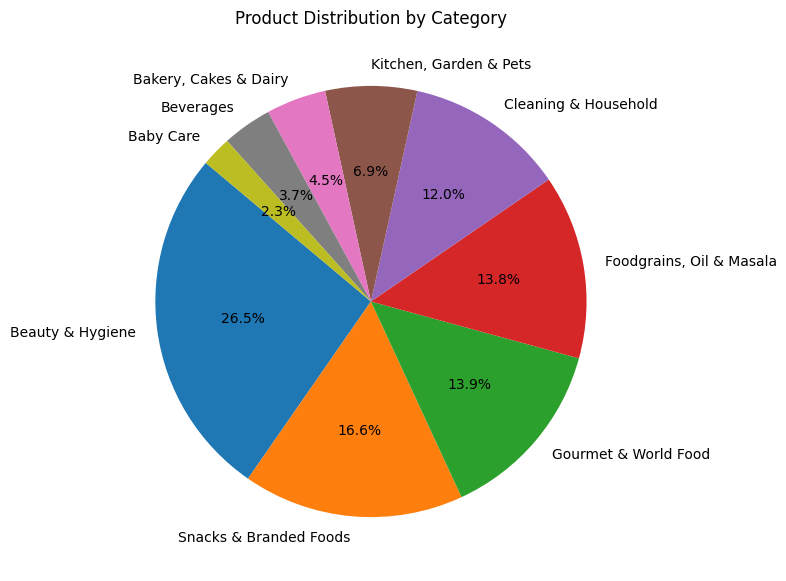

In [ ]:
category_counts = df['category'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Product Distribution by Category")
plt.show()

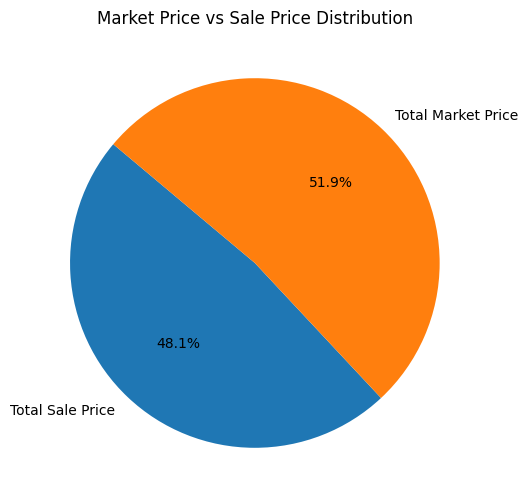

In [ ]:
values = [df['sale_price'].sum(), df['market_price'].sum()]
labels = ['Total Sale Price', 'Total Market Price']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Market Price vs Sale Price Distribution")
plt.show()


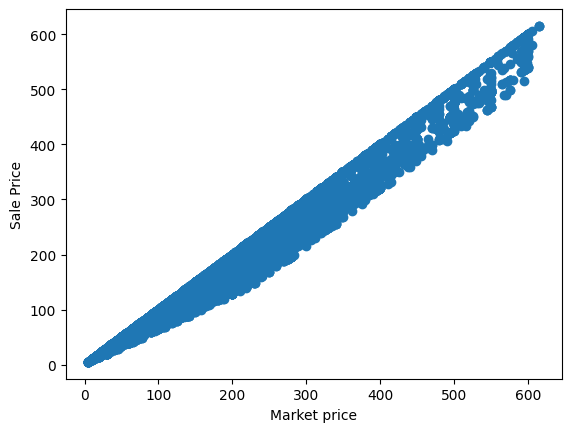

In [ ]:
plt.scatter(df['market_price'],df['sale_price'])
plt.xlabel('Market price')
plt.ylabel('Sale Price')
plt.show()

In [ ]:
df.corr(numeric_only = True)

,index,sale_price,market_price,rating,discount_amount,discount_percent
index,1.000000,-0.000414,0.001138,-0.004934,0.009984,0.003815
sale_price,-0.000414,1.000000,0.988683,0.101311,0.215452,-0.100212
market_price,0.001138,0.988683,1.000000,0.093247,0.359511,0.029119
rating,-0.004934,0.101311,0.093247,1.000000,-0.023197,-0.048251
discount_amount,0.009984,0.215452,0.359511,-0.023197,1.000000,0.812867
discount_percent,0.003815,-0.100212,0.029119,-0.048251,0.812867,1.000000


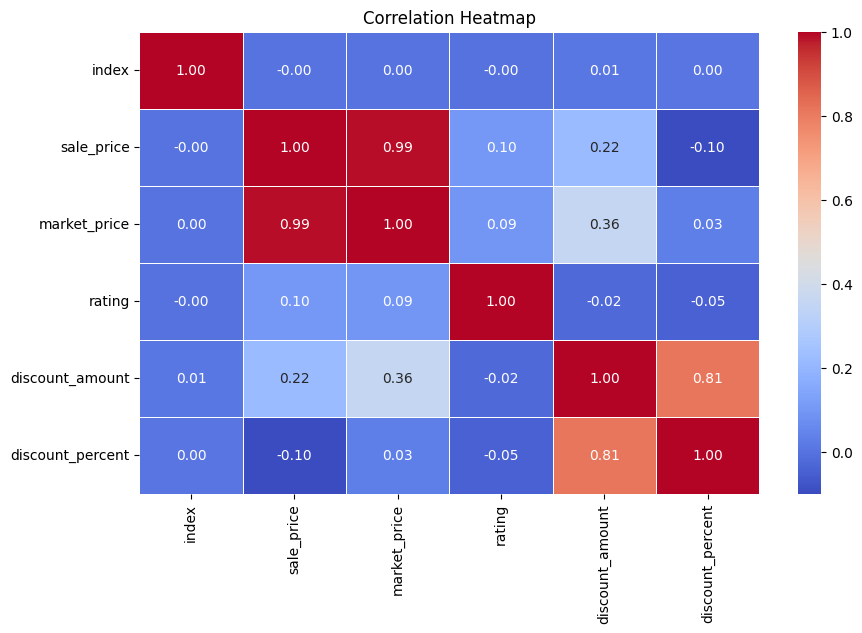

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# sample data
sample = df['sale_price'].dropna()
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

# Population mean to test against (e.g., 200)
population_mean = 200
alpha = 0.05

# t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
print(f"t_statistic : {t_statistic}\n")

# degrees of freedom
degrees_of_freedom = n - 1
print(f"degrees_of_freedom : {degrees_of_freedom}\n")

#  critical values
t_critical_upper_bound = stats.t.ppf(1 - alpha/2, degrees_of_freedom)
t_critical_lower_bound = stats.t.ppf(alpha/2, degrees_of_freedom)
print(f"t_critical_upper_bound : {t_critical_upper_bound} || "
      f"t_critical_lower_bound : {t_critical_lower_bound}\n")

#  p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom))
print(f"p_value : {p_value}\n")

# Conclusion
if p_value < alpha:
    print("Reject H0: Average sale_price is significantly different from 200")
else:
    print("Accept H0: Average sale_price is not significantly different from 200")


t_statistic : -35.918964370379605

degrees_of_freedom : 13385

t_critical_upper_bound : 1.9601412338575614 || t_critical_lower_bound : -1.960141233857562

p_value : 0.0

Reject H0: Average sale_price is significantly different from 200


In [ ]:
# Sample data
sample = df['sale_price'].dropna()
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)

# Population mean to test against
population_mean = 200
alpha = 0.05

# Z-statistic (using sample std as approx. for population σ if not given)
z_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(n))
print(f"z_statistic : {z_statistic}\n")

# Critical values (two-tailed test at 95% confidence)
z_critical_upper = stats.norm.ppf(1 - alpha/2)
z_critical_lower = stats.norm.ppf(alpha/2)
print(f"z_critical_upper : {z_critical_upper} || z_critical_lower : {z_critical_lower}\n")

#p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
print(f"p_value : {p_value}\n")

#Conclusion
if p_value < alpha:
    print("Reject H0: Average sale_price is significantly different from 200")
else:
    print("Accept H0: Average sale_price is not significantly different from 200")


z_statistic : -35.918964370379605

z_critical_upper : 1.959963984540054 || z_critical_lower : -1.9599639845400545

p_value : 0.0

Reject H0: Average sale_price is significantly different from 200


#**Machine Learning**

**Apply label encoding on this data**

In [ ]:
le = LabelEncoder()

for x in df.columns:
  if  df[x].dtype=='object':
    df[x] = le.fit_transform(df[x])

In [ ]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount_amount,discount_percent
0,1,3876,2,42,1416,220.0,220.0,160,4.1,9589,0.0,0.000000
3,4,1631,4,9,976,149.0,176.0,199,3.7,6032,27.0,15.340909
4,5,2565,2,8,1035,162.0,162.0,34,4.4,6332,0.0,0.000000
5,6,3953,4,0,992,169.0,199.0,105,3.3,8436,30.0,15.075377
6,7,6349,2,67,1317,58.0,58.0,124,3.6,7982,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
27548,27549,639,2,42,940,499.0,499.0,292,5.0,8044,0.0,0.000000
27549,27550,7795,8,63,109,61.0,61.0,258,4.0,7017,0.0,0.000000
27550,27551,11489,2,36,807,199.2,249.0,264,3.9,5120,49.8,20.000000
27551,27552,9226,6,19,1201,67.5,75.0,170,4.0,7484,7.5,10.000000


In [ ]:
df.drop(columns = ['index'],inplace = True)
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount_amount,discount_percent
0,3876,2,42,1416,220.0,220.0,160,4.1,9589,0.0,0.000000
3,1631,4,9,976,149.0,176.0,199,3.7,6032,27.0,15.340909
4,2565,2,8,1035,162.0,162.0,34,4.4,6332,0.0,0.000000
5,3953,4,0,992,169.0,199.0,105,3.3,8436,30.0,15.075377
6,6349,2,67,1317,58.0,58.0,124,3.6,7982,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
27548,639,2,42,940,499.0,499.0,292,5.0,8044,0.0,0.000000
27549,7795,8,63,109,61.0,61.0,258,4.0,7017,0.0,0.000000
27550,11489,2,36,807,199.2,249.0,264,3.9,5120,49.8,20.000000
27551,9226,6,19,1201,67.5,75.0,170,4.0,7484,7.5,10.000000


In [ ]:
x = df.drop(columns=['sale_price'])
y = df['sale_price']

In [ ]:
x

,product,category,sub_category,brand,market_price,type,rating,description,discount_amount,discount_percent
0,3876,2,42,1416,220.0,160,4.1,9589,0.0,0.000000
3,1631,4,9,976,176.0,199,3.7,6032,27.0,15.340909
4,2565,2,8,1035,162.0,34,4.4,6332,0.0,0.000000
5,3953,4,0,992,199.0,105,3.3,8436,30.0,15.075377
6,6349,2,67,1317,58.0,124,3.6,7982,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
27548,639,2,42,940,499.0,292,5.0,8044,0.0,0.000000
27549,7795,8,63,109,61.0,258,4.0,7017,0.0,0.000000
27550,11489,2,36,807,249.0,264,3.9,5120,49.8,20.000000
27551,9226,6,19,1201,75.0,170,4.0,7484,7.5,10.000000


In [ ]:
y

,sale_price
0,220.0
3,149.0
4,162.0
5,169.0
6,58.0
...,...
27548,499.0
27549,61.0
27550,199.2
27551,67.5


#**Vrainace Inflation Factor(VIF)**

In [ ]:
vif_df = pd.DataFrame()
vif_df['columns'] = x.columns
vif_df['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,columns,VIF
0,product,4.097883
1,category,4.708986
2,sub_category,4.806283
3,brand,4.590696
4,market_price,4.363068
5,type,4.481244
6,rating,15.909494
7,description,4.569994
8,discount_amount,6.350489
9,discount_percent,6.079425


In [ ]:
x.drop('rating',axis=1,inplace=True)

In [ ]:
vif_df = pd.DataFrame()
vif_df['columns'] = x.columns
vif_df['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_df

,columns,VIF
0,product,3.787646
1,category,4.077740
2,sub_category,4.518875
3,brand,4.382472
4,market_price,3.600997
5,type,4.172105
6,description,4.348542
7,discount_amount,6.156433
8,discount_percent,5.756644


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
x_train.shape

(10708, 9)

In [ ]:
y_train.shape

(10708,)

In [ ]:
y_test.shape

(2678,)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x='market_price',  y='sale_price', z='rating', color='brand', size='sale_price')
fig.show()


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([120. ,  50. ,  85.5, ..., 350. ,  59. , 210. ])

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 1.178040322332506e-13
MSE 2.233547068130317e-26
R2 score 1.0


In [ ]:
model.coef_

array([ 1.28812773e-17, -1.31283873e-14, -6.98768300e-16, -1.05384451e-16,
        1.00000000e+00,  6.06719536e-16, -2.08166817e-17, -1.00000000e+00,
       -6.69355928e-16])

In [ ]:
model.intercept_

np.float64(8.526512829121202e-14)

#**Logistic Regression**

In [ ]:
x1 = df.drop(columns=['sale_price'])
y1 = df['sale_price']

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=45)

In [ ]:
x1_train.shape

(10708, 10)

In [ ]:
x1_test.shape

(2678, 10)

In [ ]:
y1_train.shape

(10708,)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Convert continuous target into 3 classes
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y1_train_binned = kbd.fit_transform(y1_train.values.reshape(-1,1)).ravel()

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(x1_train, y1_train_binned)

LogisticRegression(max_iter=1000)

In [ ]:
y1_pred = model1.predict(x1_test)

In [ ]:
y1_pred

array([1., 1., 1., ..., 2., 1., 1.])

In [ ]:
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print("MSE:", mse)
print("R2 score:", r2)


MSE: 41241.609759708736
R2 score: -1.707891833794056


In [ ]:
# Convert Series to NumPy array and reshape
y1_test_array = y1_test.to_numpy().reshape(-1, 1)

# Transform using the same KBinsDiscretizer
y1_test_binned = kbd.transform(y1_test_array).ravel()

# Now you can calculate accuracy
accuracy = accuracy_score(y1_test_binned, y1_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8577296489917849


#**Decision Tree**

In [ ]:
x2 = df.drop(columns = 'sale_price')
y2 = df['sale_price']

In [ ]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x,y,test_size = 0.2,random_state =100)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Suppose y is your continuous target column (pandas Series)
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Fit on training target and transform both train and test
y_train2 = kbd.fit_transform(y2_train.to_numpy().reshape(-1,1)).ravel()
y_test2 = kbd.transform(y2_test.to_numpy().reshape(-1,1)).ravel()


In [ ]:
dec_tree = DecisionTreeClassifier(max_depth=4)
dec_tree.fit(x2_train, y_train2)

DecisionTreeClassifier(max_depth=4)

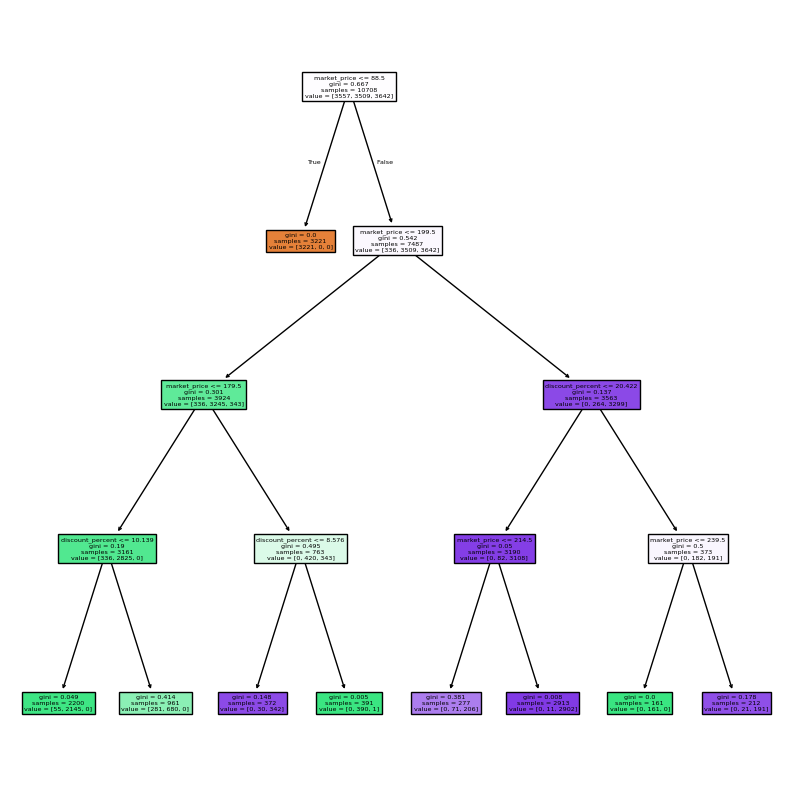

In [ ]:
plt.figure(figsize = (10,10))
final_tree = tree.plot_tree(dec_tree, feature_names = x.columns, filled = True)

In [ ]:
dec_tree.get_depth()

4

In [ ]:
y_pred = dec_tree.predict(x2_test)

In [ ]:
y_pred

array([0., 2., 0., ..., 0., 1., 1.])

In [ ]:
accuracy = accuracy_score(y_test2, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9648991784914115


#**Random Forest**

In [ ]:
x3 = df.drop(columns = 'sale_price')
y3 = df['sale_price']

In [ ]:
x3

,product,category,sub_category,brand,market_price,type,rating,description,discount_amount,discount_percent
0,3876,2,42,1416,220.0,160,4.1,9589,0.0,0.000000
3,1631,4,9,976,176.0,199,3.7,6032,27.0,15.340909
4,2565,2,8,1035,162.0,34,4.4,6332,0.0,0.000000
5,3953,4,0,992,199.0,105,3.3,8436,30.0,15.075377
6,6349,2,67,1317,58.0,124,3.6,7982,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
27548,639,2,42,940,499.0,292,5.0,8044,0.0,0.000000
27549,7795,8,63,109,61.0,258,4.0,7017,0.0,0.000000
27550,11489,2,36,807,249.0,264,3.9,5120,49.8,20.000000
27551,9226,6,19,1201,75.0,170,4.0,7484,7.5,10.000000


In [ ]:
y3

,sale_price
0,220.0
3,149.0
4,162.0
5,169.0
6,58.0
...,...
27548,499.0
27549,61.0
27550,199.2
27551,67.5


In [ ]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x3_train.shape

(10708, 9)

In [ ]:
x3_test.shape

(2678, 9)

In [ ]:
y3_train.shape

(10708,)

In [ ]:
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
y3_train = kbd.fit_transform(y3_train.to_numpy().reshape(-1,1)).ravel()
y3_test = kbd.transform(y3_test.to_numpy().reshape(-1,1)).ravel()

In [ ]:
final_model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=100)
final_model.fit(x3_train, y3_train)

RandomForestClassifier(max_depth=4, n_estimators=10, random_state=100)

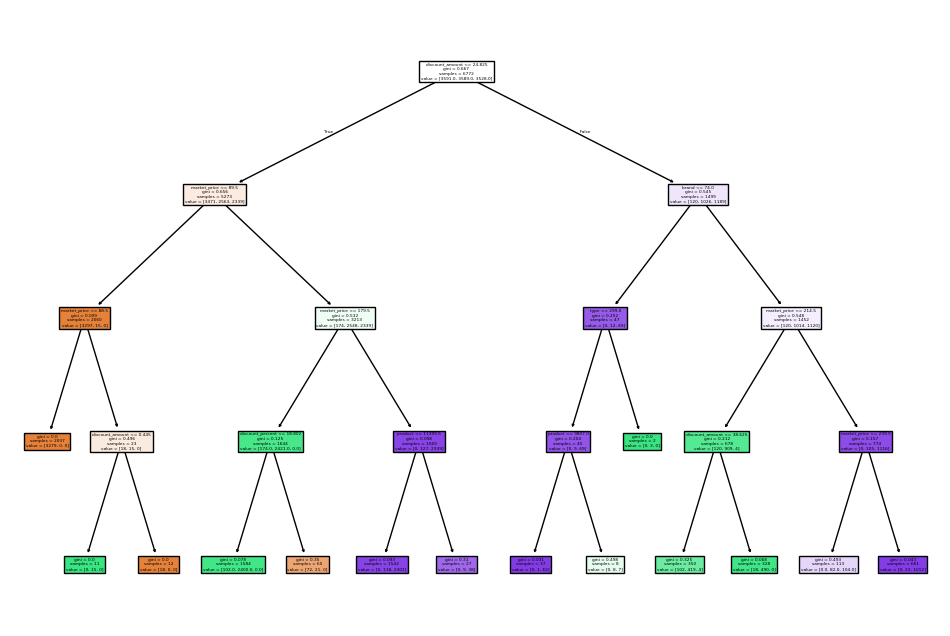

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(final_model.estimators_[0], feature_names=x3_train.columns, filled=True)
plt.show()

In [ ]:
y3_pred = final_model.predict(x3_test)
accuracy_score(y3_pred,y3_test)

0.962285287528006